In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vedantpadole","key":"3841cb3f65c269a9264a4ac06efb6c3f"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           8519        310  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36           1210         36  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           3803         91  1.0              
omartorres25/honda-data                                     

In [ ]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

 97% 273M/281M [00:02<00:00, 124MB/s]
100% 281M/281M [00:02<00:00, 105MB/s]


In [ ]:
!unzip /content/indian-sign-language-isl.zip

Streaming output truncated to the last 5000 lines.
  inflating: Indian/V/819.jpg        
  inflating: Indian/V/82.jpg         
  inflating: Indian/V/820.jpg        
  inflating: Indian/V/821.jpg        
  inflating: Indian/V/822.jpg        
  inflating: Indian/V/823.jpg        
  inflating: Indian/V/824.jpg        
  inflating: Indian/V/825.jpg        
  inflating: Indian/V/826.jpg        
  inflating: Indian/V/827.jpg        
  inflating: Indian/V/828.jpg        
  inflating: Indian/V/829.jpg        
  inflating: Indian/V/83.jpg         
  inflating: Indian/V/830.jpg        
  inflating: Indian/V/831.jpg        
  inflating: Indian/V/832.jpg        
  inflating: Indian/V/833.jpg        
  inflating: Indian/V/834.jpg        
  inflating: Indian/V/835.jpg        
  inflating: Indian/V/836.jpg        
  inflating: Indian/V/837.jpg        
  inflating: Indian/V/838.jpg        
  inflating: Indian/V/839.jpg        
  inflating: Indian/V/84.jpg         
  inflating: Indian/V/840.jpg        

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,GlobalMaxPooling2D,Conv2D,Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
batch_size=32
img_height=256
img_width=256
train='/content/Indian'

basic=tf.keras.preprocessing.image_dataset_from_directory(
    train,
    shuffle=True,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 42745 files belonging to 35 classes.


In [ ]:
class_names=basic.class_names
class_names

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
for image_batch,label_batch in basic.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[29 29 17  4 11 26 10  3 23 28  5 28 13 27 14  4 27 21  8 17 21 14  8  1
 24  3 23 29 27  6 18 26]


In [ ]:
# printing the first image and it is tensor so convert to numpy
for image_batch,label_batch in basic.take(1):
  print(image_batch[0].numpy())

[[[20.     20.     32.    ]
  [19.25   19.25   31.25  ]
  [17.75   17.75   29.75  ]
  ...
  [10.25   24.5    13.    ]
  [24.75   41.5    27.    ]
  [32.     50.     34.    ]]

 [[19.5    19.5    31.5   ]
  [18.875  18.875  30.875 ]
  [17.625  17.625  29.625 ]
  ...
  [14.625  29.4375 17.9375]
  [26.375  43.3125 28.8125]
  [32.25   50.25   34.25  ]]

 [[18.5    18.5    30.5   ]
  [18.125  18.125  30.125 ]
  [17.375  17.375  29.375 ]
  ...
  [23.375  39.3125 27.8125]
  [29.625  46.9375 32.4375]
  [32.75   50.75   34.75  ]]

 ...

 [[ 4.75   18.25    8.    ]
  [ 4.75   18.25    8.    ]
  [ 4.75   18.25    8.    ]
  ...
  [ 8.3125 39.8125 17.25  ]
  [16.9375 50.9375 25.75  ]
  [21.25   56.5    30.    ]]

 [[14.25   30.75   18.    ]
  [14.25   30.75   18.    ]
  [14.25   30.75   18.    ]
  ...
  [15.9375 49.9375 24.75  ]
  [23.8125 60.3125 32.25  ]
  [27.75   65.5    36.    ]]

 [[19.     37.     23.    ]
  [19.     37.     23.    ]
  [19.     37.     23.    ]
  ...
  [19.75   55.     28.5 

In [ ]:
# printing shape of first image
for image_batch,label_batch in basic.take(1):
  print(image_batch[0].shape)

(256, 256, 3)


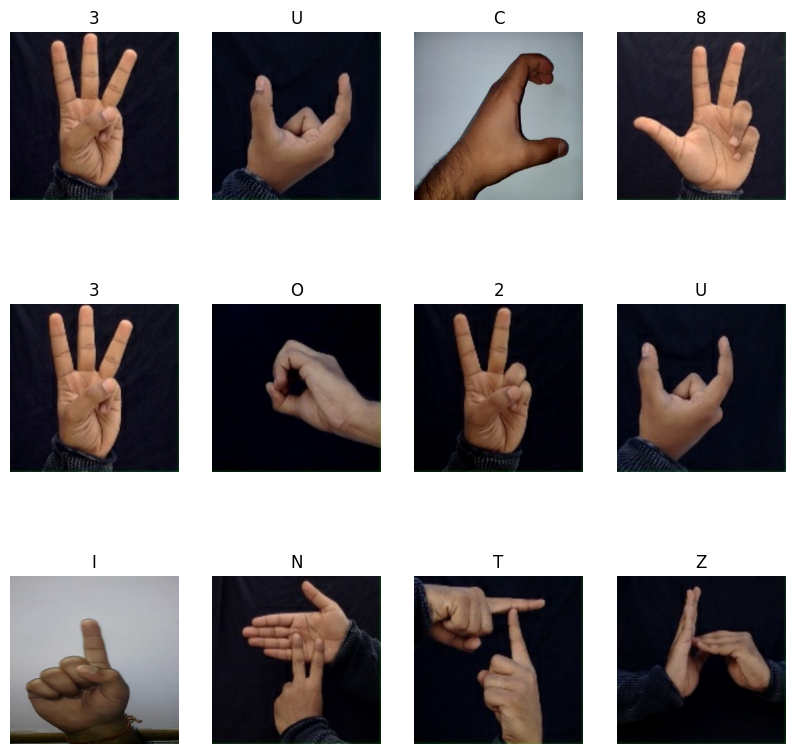

In [ ]:
# printing first few images
plt.figure(figsize=(10,10))
for image_batch,label_batch in basic.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [ ]:
# Splitting dataset
# 80 percent as training
# from remaining 20 percent to validation-> 10, testing -> 10 so half-half

In [ ]:
train_size=0.8 # our trainig size

In [ ]:
training_ds=basic.take(int(len(basic)*train_size))
len(training_ds)

1068

In [ ]:
basic=basic.skip(int(len(basic)*train_size)) # skipping whatever we used 
len(basic)

268

In [ ]:
val_size=0.5 # half of remaining
val_ds=basic.take(int(len(basic)*val_size))
len(val_ds)

134

In [ ]:
basic=basic.skip(int(len(basic)*val_size)) # skipping whatever we used 
len(basic)

134

In [ ]:
test_ds=basic.take(len(basic))
len(test_ds)

134

In [ ]:
# for predicting purpose
predict='/content/asl_alphabet_test'

predicting_ds=tf.keras.preprocessing.image_dataset_from_directory(
    predict,
    shuffle=True,
    image_size=(img_height,img_width),
    batch_size=batch_size
)
len(predicting_ds)

Found 28 files belonging to 1 classes.


1

In [ ]:
# to improve the fetching and improve performance just like pipelining
#training_ds=training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# should we do data Augmentation?

In [ ]:
from keras.layers.preprocessing.image_preprocessing import Resizing
from keras.engine.sequential import Sequential
from keras.layers import Rescaling,Conv2D,MaxPooling2D,Dense,Flatten,GlobalMaxPooling2D,Dropout
model=Sequential()
model.add(Resizing(img_height,img_width))
model.add(Rescaling(1.0/255))
model.add(Conv2D(16,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(GlobalMaxPooling2D())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(class_names),activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

FITTING THE MODEL

In [ ]:
r = model.fit(training_ds, validation_data=val_ds,epochs=15)

Epoch 1/15
1068/1068 [==============================] - 101s 83ms/step - loss: 0.5030 - accuracy: 0.8620 - val_loss: 0.0089 - val_accuracy: 0.9972
Epoch 2/15
1068/1068 [==============================] - 89s 83ms/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.0068 - val_accuracy: 0.9981
Epoch 3/15
1068/1068 [==============================] - 86s 80ms/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 1.0708e-04 - val_accuracy: 1.0000
Epoch 4/15
1068/1068 [==============================] - 87s 81ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 5/15
1068/1068 [==============================] - 85s 80ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.0023 - val_accuracy: 0.9991
Epoch 6/15
1068/1068 [==============================] - 85s 80ms/step - loss: 0.0103 - accuracy: 0.9978 - val_loss: 8.6010e-04 - val_accuracy: 0.9998
Epoch 7/15
1068/1068 [==============================] - 86s 80ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss:

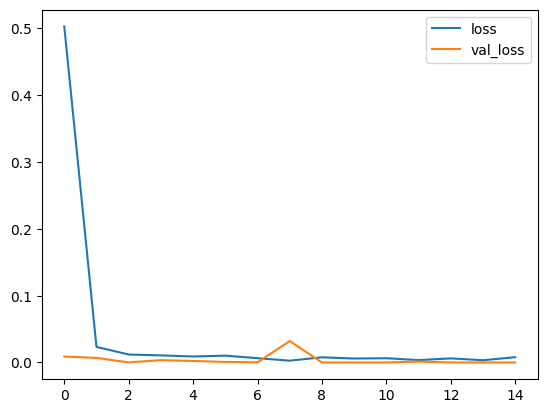

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

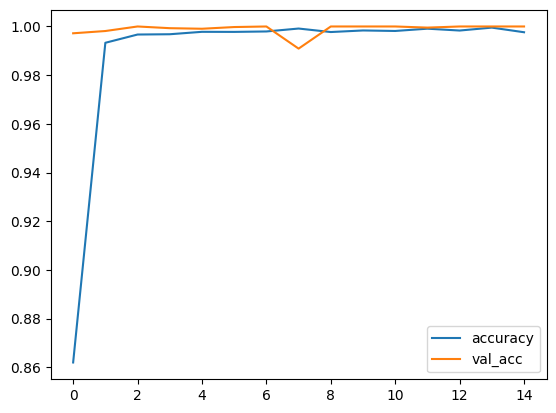

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

ACCURACY ON TESTING 

In [ ]:
scores=model.evaluate(test_ds)
scores

134/134 [==============================] - 41s 42ms/step - loss: 1.3483e-05 - accuracy: 1.0000


[1.3483353541232646e-05, 1.0]

PREDICTING SOME IMAGES

First image to predict
first image's actual label:  J
1/1 [==============================] - 0s 116ms/step
predicted class is:  J


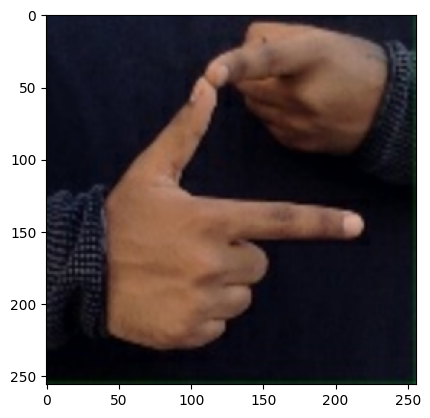

In [ ]:
for images_batch,labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels=labels_batch[0].numpy()
  print("First image to predict")
  plt.imshow(first_image)
  print("first image's actual label: ",class_names[first_label])
  batch_prediction=model.predict(images_batch)
  print('predicted class is: ',class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 19ms/step


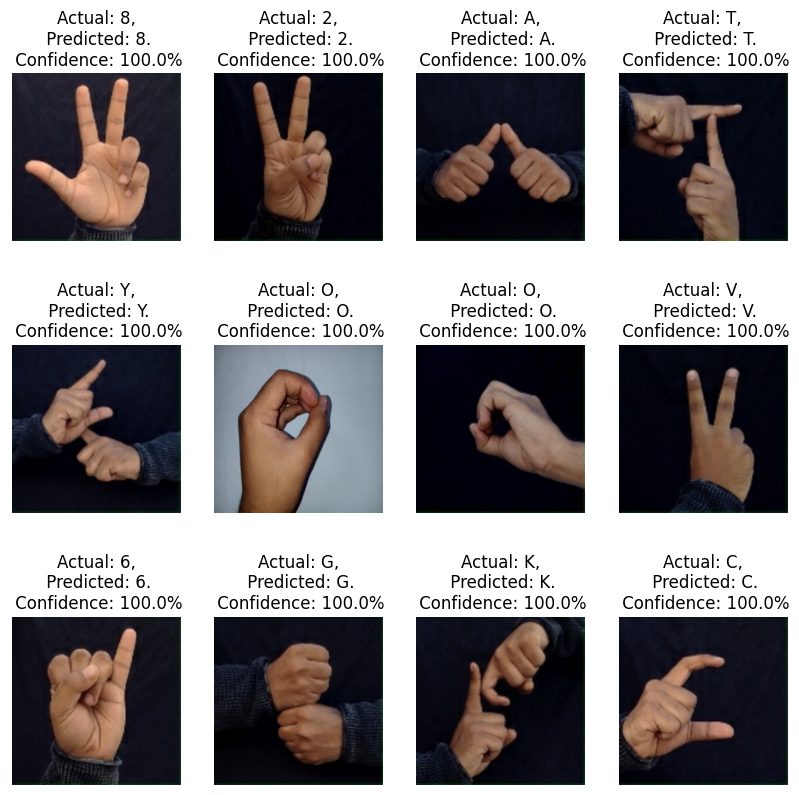

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model.save("Indian_asl_images.h5")